# W203 Lab 3: A Regression Study of COVID-19- Stage 1 Draft

## Team- Rashmi Singh, Christina Chen, Tian Zhu, Sarah Yifei Wang

## Section 3 Tuesday 6:30 PM PT


## 1. Introduction

During the time of COVID-19, many studies have been conducted to assess the widespread use of face masks in reducing the spread of the disease. This is particularly true for when masks are used universally within communities with denser populations. The CDC has advocated for masks, or any cloth face coverings for that matter, as a barrier to prevent respiratory droplets from traveling into the air when a person coughs, sneezes, talks, or raises their voice. CNN reports that if 95% of Americans wore face masks in public, it could prevent more than 450,000 deaths by November 1, 2020. Despite the effectiveness of preventing spread of COVID-19 when wearing a mask, many have not followed suit in the accordance with CDC guidelines. As states enter different phases of reopening, many have executed mandatory face mask use policy for employees in public-facing businesses. The concept that this specific study will measure is 
###### The effects of the policy of mandating face mask in public facing businesses  on the total number of COVID cases recorded for each state. 
We assume the dates on which the mandate was placed is critical to our study for  measuring  how the timeliness of the mandate date ultimately save thousands of lives. We also want to understand how other factors such the population at risk of serious illness, stay at home duration, business closed duration has played a role in the total number of cases and how they interact with face mask mandate policy.

In our study, we conducted various tasks prior to our linear regression models: 
1. First, we studied the data and tried to understand the distribution of total number of cases by each state, which we used as dependent variable for our study. Our aim in understanding the distribution is to identify outliers as well as get a general idea about the dependent variable spread. 
2. Then we cleaned our data and identified issues such as duplicates or missing value that can affect our study. 
3. We also performed exploratory data analysis (EDA) in order to form our base model and identified key variables to be used for our linear regression models. 
4. We identified required data transformation for effective study and required key variables created from 'Mandate face mask in public facing business' date
5. Furthermore, we also took into consideration the number of days businesses were closed, as the mandate only restricts employess in public-facing businesses; number of days stay at home policy was in place; population at risk and number of days the face mask mandate is in place.
6. We studied the correlation between the independent variables and with the dependent variable to assess our assumption.
7. We created base model and conducted 2 improvements on it. We checked the quality of model along with multicollinearity check.
8. Lastly, we assessed CLM assumptions and verified if any voilation are there. We also summarized statitical and practical significance of our study.
9. We did the study on ommitted variables before concluding.

######  Installing required packages for the study

In [1]:
suppressMessages(install.packages("DataExplorer"))
suppressMessages(install.packages("lmtest"))
suppressMessages(install.packages("ggpubr"))
#install.packages("sandwich")
suppressMessages(install.packages("stargazer"))
suppressMessages(install.packages("tidyselect"))
suppressMessages(install.packages("tidyverse"))
suppressMessages(install.packages("janitor"))

package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rashm\AppData\Local\Temp\RtmpgL0GkY\downloaded_packages
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rashm\AppData\Local\Temp\RtmpgL0GkY\downloaded_packages
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rashm\AppData\Local\Temp\RtmpgL0GkY\downloaded_packages
package 'stargazer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rashm\AppData\Local\Temp\RtmpgL0GkY\downloaded_packages
package 'tidyselect' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rashm\AppData\Local\Temp\RtmpgL0GkY\downloaded_packages
package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rashm\AppData\Local\Temp\RtmpgL0GkY\downloaded_pac

In [2]:
library(plyr, quietly = T)
library(dplyr, quietly = T)
library(ggplot2, quietly = T)
library(data.table, quietly = T)
library(DataExplorer, quietly = T)
library(lubridate, quietly = T)
library(gridExtra, quietly = T)
library(readxl, quietly = T)
library(tidyverse, quietly = T)
library(readxl, quietly = T)
library(lmtest, quietly = T)
library(car, quietly = T)
library(sandwich, quietly = T)
library(stargazer, quietly = T)
library(janitor, quietly = T)
library(ggpubr, quietly = T)


Warning message:
"package 'plyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'DataExplorer' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is mas

In [3]:
#loading the data
suppressWarnings(suppressMessages(df<- read_excel("covid-19_dist0720 .xlsx", sheet = "Covid-19")))



## 2. Model Building Process

### Data Cleaning

In [4]:
# Number of records in the data
nrow(df)



[1] 52

###### 1. Remove duplicates

Scanning through the data, it looks like there are two records for Arizona. We will drop the row 'arizona' as it looks duplicate. 


In [5]:
# removing duplicate row for Arizona
df<-df[-c(4),]


##### 2. Outliers

Lets look at summary and histogram of total number of cases to examine the the distribution.

In [6]:
summary(df$`Total Cases`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    939   11415   31353   56128   68003  398828 

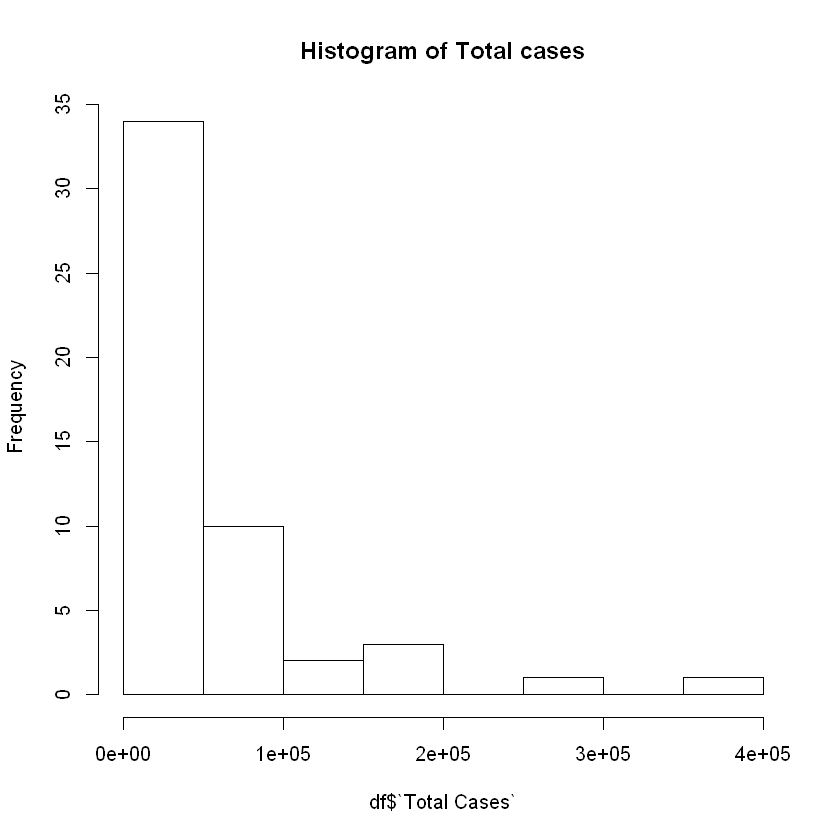

In [7]:
hist(df$`Total Cases`, main="Histogram of Total cases")

The range of the total cases is very wide with minimum of 939 and maximum close to 400,000. Also, we can see from histogram as well as median and mean value that the distribution is highly right skew. Hence we need to identify outliers and determine if they can be removed for our study

Warning message:
"Use of `df$State` is discouraged. Use `State` instead."Warning message:
"Use of `df$`Total Cases`` is discouraged. Use `Total Cases` instead."

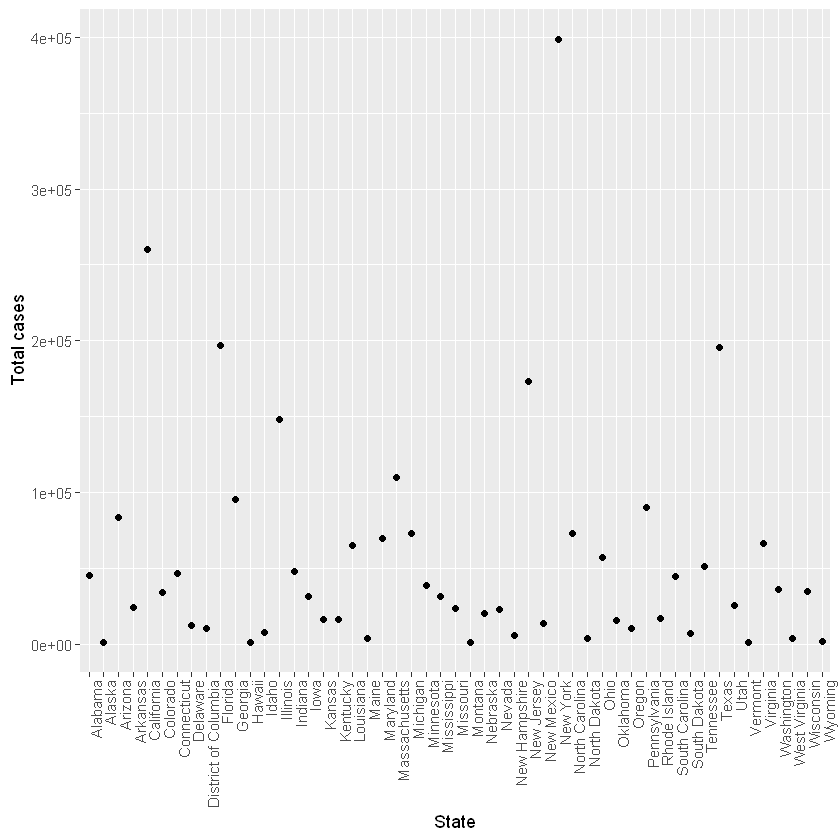

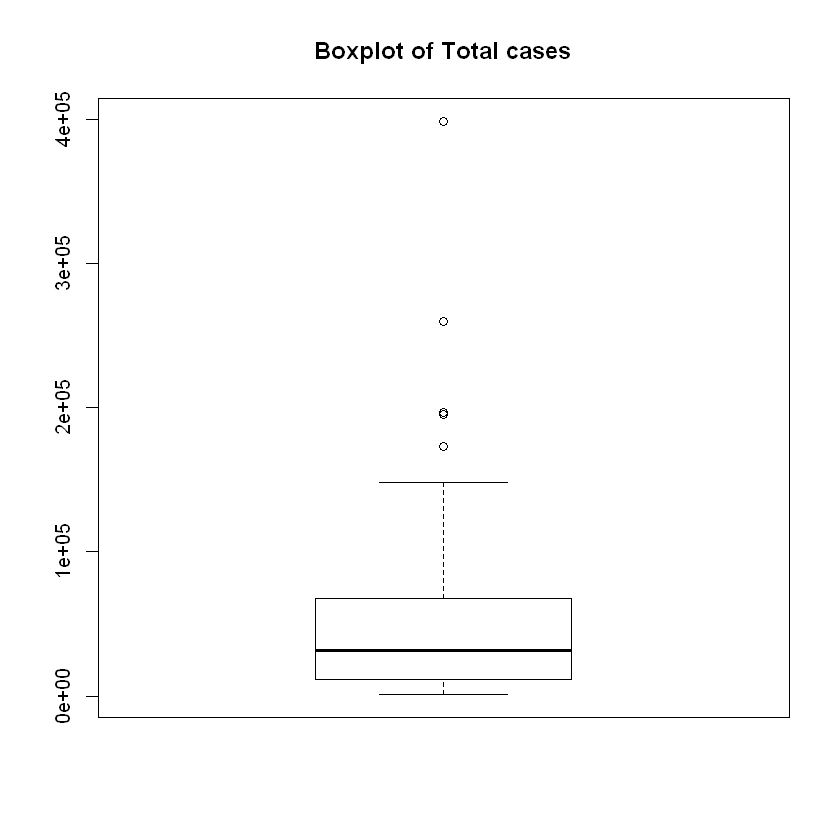

In [8]:
# Outliers 
q<-ggplot(df, aes(x = df$State, y = df$`Total Cases`))+  geom_point() +  labs(y = "Total cases", x = "State")
q + theme(axis.text.x = element_text(angle = 90, hjust = 1))


boxplot(df$`Total Cases`, main="Boxplot of Total cases")

From the ggplot and boxplot, we can see that New York,California, Florida, New Jersey and Texas have very large number of cases and also falling outside the maximum of boxplot. It makes practical sense as these states have large population concentrated in metropolitan cities like NYC, LA, etc and do not necessarily follow the characteristics of lifestyle and demographics of other states. New York cases are significantly high because of high cases in NYC alone. The city was the epicenter of the COVID cases as this is a global city with large number of people coming in from different parts of the world and the spread had started there much earlier before emergency was applied. From boxplot we can see that while most states have cases below 100,000, thee states are having much higher cases. Because of the characteristics of the lifestyle and population of these states being very different from other states, it is reasonable to assume them as outlier for this study.

In [9]:
# Removing  New York,California, Florida, New Jersey and Texas as outlier
df <-df[-c(5,10,31,33,44),]


##### 3. Data Formatting

Certain date columns are not in date format, hence we need to convert them into date type in order to use them for study. 


In [10]:
#Converting date columns to date
df$`Stay at home/ shelter in place` <- excel_numeric_to_date(df$`Stay at home/ shelter in place`) 
df$`End/relax stay at home/shelter in place` <- excel_numeric_to_date(df$`End/relax stay at home/shelter in place`)
df$`Closed non-essential businesses` <- excel_numeric_to_date(df$`Closed non-essential businesses`)
df$`Began to reopen businesses statewide` <- excel_numeric_to_date(df$`Began to reopen businesses statewide`)
df$`Mandate face mask use by employees in public-facing businesses` <- excel_numeric_to_date(df$`Mandate face mask use by employees in public-facing businesses`)


In [11]:
summary(df$`Population 2018`)
summary(df$`Total Cases`)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  577737  1503920  3757872  4546924  6550522 12807060 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    939   10293   24657   35605   50575  148373 

As we can see from summary,both population and cases are not on same scale, it is important to have them normalized for effective regression study.

In [12]:
#normalization of total cases and population 2018 variables

df$case_norm <- round((df$`Total Cases` - min(df$`Total Cases`))/(max(df$`Total Cases`)-min(df$`Total Cases`)),2)
df$pop18_norm <- round((df$`Population 2018` - min(df$`Population 2018`))/(max(df$`Population 2018`)-min(df$`Population 2018`)),2)

summary(df$case_norm)
summary(df$pop18_norm)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0600  0.1650  0.2354  0.3350  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0775  0.2600  0.3241  0.4875  1.0000 

### Identify key variables for regression study

As we want to measure the effect of the policy, it is reasonable to look at which states have policy in effect as our assumption is that the not having the face mask mandate in busness policy will have impact on number of cases.
Also, number of cases will also be explained by the population of the state, as the cases will definitely vary with the charactericts of the state (population size, demographics etc). In our study, we will use the population of the state (normalized) as another key variable.
Key-Variables in scope:
1. Face mask mandate in place (Yes, No)
2. Population of the state (normalized)


In [13]:
#Calculating key variables
#encoding Manadate face mask date column to factor 1 and 0. 1 means yes, 0 means No
df$`MandateFaceMask_fac` <- ifelse(as.character(df$`Mandate face mask use by employees in public-facing businesses`)=="1899-12-30", 0, 1)

###### Covariates
There could also be other explanatory variables that can explain the number of cases like below. We can use these in improvement models:
1. Number of days face mask mandate was delayed- Our assumption is the longer a state took in applying the Face mask in public business mandate policy, the large impact it had on total number of cases.
2. Number of days since mandate been applied - Our assumption is that longer the policy has been in place, the more effect the policy has on the number of cases.
3. Number of days business were closed- We can assume that in this duration, policy (even if it was in place) will have minimal to no effect, as business itself were closed.
4. Number of days stay at home policy was in place- The longer this policy is appplied, the possiblity of people interacting in the business place is minimal.
5. Population at risk- This population has higher risk of getting infected and spread infection.


In [14]:
#Calculating other covariates
# Calculating duration variables

df$delay_facemask_mandate<- as_datetime(df$`Mandate face mask use by employees in public-facing businesses`) -  as_datetime(df$`State of emergency`)
df$DaysSince_Facemask_mandate <- as.numeric(as_datetime("2020-07-06")- as_datetime(df$`Mandate face mask use by employees in public-facing businesses`))
df$BusinessClosed_duration <- df$`Began to reopen businesses statewide` -  df$`Closed non-essential businesses`
df$Stay_at_Home_duration<-df$`End/relax stay at home/shelter in place` -  df$`Stay at home/ shelter in place`




In [15]:
df$DaysSince_Facemask_mandate 

[1]    56    73    59    56    74    94    66    82    70    81 44018    66
[13]    66 44018 44018    56    66    66    79    61    71    35    60 44018
[25] 44018    63    58    66    61    10    69    68 44018    58    78    79
[37] 44018 44018 44018    87    80    38    63    63 44018    66

###### Imputing missing data

We see that some of dates are missing, for examples, few states have Business reopen date but not business closing date. Hence we need to impute values for duration variables for such states. This could be issue with data.

We can use median number of duration days of other states to impute the missing values

In [16]:
#encoding date columns to factor 1 and 0. 1 means yes, 0 means No to be used in median calculations.
df$`StayAtHome_fac` <- ifelse(as.character(df$`Stay at home/ shelter in place`)=="1899-12-30", 0,1)
df$`EndStayAtHome_fac` <- ifelse(as.character(df$`End/relax stay at home/shelter in place`)=="1899-12-30",0,1)
df$`ClosedNonEssBusiness_fac` <- ifelse(as.character(df$`Closed non-essential businesses`)=="1899-12-30",0,1)
df$`ReopenBusiness_fac` <- ifelse(as.character(df$`Began to reopen businesses statewide`) == "1899-12-30", 0, 1)
df$`MandateFaceMask_fac` <- ifelse(as.character(df$`Mandate face mask use by employees in public-facing businesses`)=="1899-12-30", 0, 1)


In [17]:
# calculating mean duration values for missing data
(MandateDelay_mean = round(mean(df$delay_facemask_mandate[df$MandateFaceMask_fac== 1]),2))
(StayHomeDuration_mean = round(mean(df$Stay_at_Home_duration[df$EndStayAtHome_fac==1 & df$StayAtHome_fac==1]),2))
(BusinessClosed_mean = round(mean(df$BusinessClosed_duration[df$ClosedNonEssBusiness_fac==1 & df$ReopenBusiness_fac==1]),2))


Time difference of 52.56 days

Time difference of 48.44 days

Time difference of 42.92 days

In [18]:

#imputing mean value for missing data

df$delay_facemask_mandate[df$MandateFaceMask_fac==0] <- MandateDelay_mean
df$Stay_at_Home_duration[df$EndStayAtHome_fac==0 | df$StayAtHome_fac==0] <- StayHomeDuration_mean
df$BusinessClosed_duration[df$ClosedNonEssBusiness_fac==0 | df$ReopenBusiness_fac==0] <- BusinessClosed_mean

# for the states that have not applied face mask mandate, we can assume them to have 0 days for days since face mask mandate applied.
df$DaysSince_Facemask_mandate[df$MandateFaceMask_fac==0] <- 0



Since percent of state population are not comparable to each other (35% of Alaska is not same as 35% of Massachussets), hence we need to calculate the actual population from percent and normalize them to make them comparable.

In [19]:

#Calculate population at risk from percent of the population and normalizing
df$at_risk_pop <- round((df$`Percent at risk for serious illness due to COVID`*df$`Population 2018`)/100,0)
df$at_risk_pop_norm <- round((df$at_risk_pop - min(df$at_risk_pop))/(max(df$at_risk_pop)-min(df$at_risk_pop)),2)


##### Verification of assumption on the choice of key variables
Lets see the correlation of our dependent variable total cases normalized with population 2018 normalized and Mandate face mask (Yes, No)

[1] 0.86

`geom_smooth()` using formula 'y ~ x'


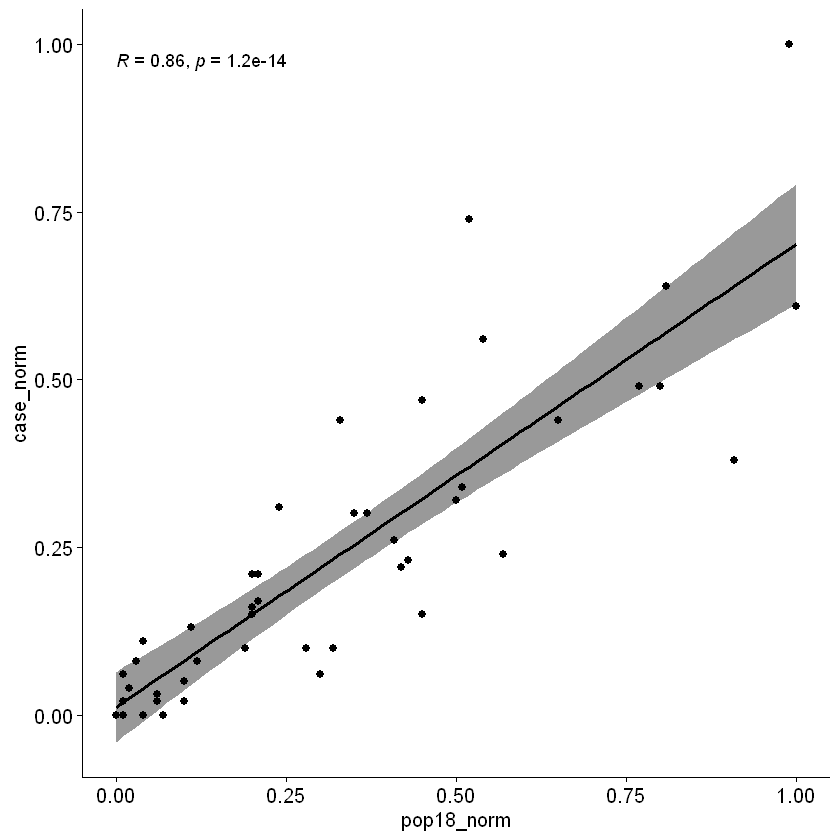

In [20]:
#checking correlation between dependent and independent variables

#Correlation between population normalized and total cases normalized
correl_df <- round(cor(x=df$pop18_norm,y= df$case_norm), 2) 
correl_df
ggscatter(df,x ="pop18_norm",y="case_norm", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson")


[1] 0.2

`geom_smooth()` using formula 'y ~ x'


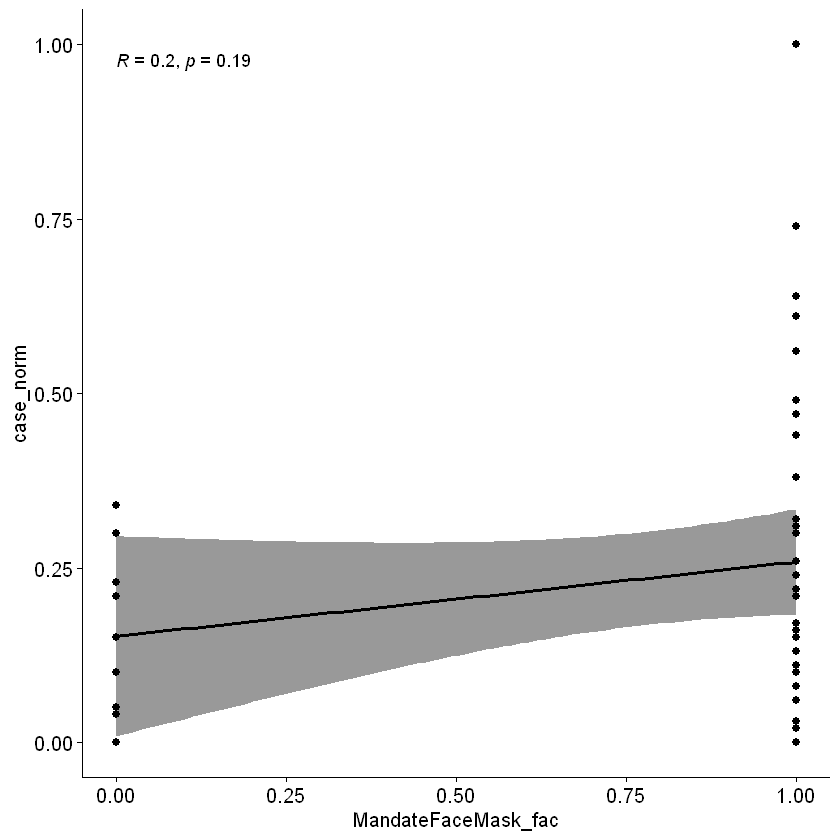

In [21]:

#Correlation between Mnadate face mask factor and total cases normalized
correl_df1 <- round(cor(x=df$`MandateFaceMask_fac`,y= df$case_norm), 2) 
correl_df1
ggscatter(df,x ="MandateFaceMask_fac",y="case_norm", add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson")

We see a slight positive correlation between total cases and mandate face mask factor suggesting that there is very slight increase in number of cases with mandate of face mask. However it is reasonable to include this variable for our regression model to study its impact and explore the error term.

[1] 0.12

`geom_smooth()` using formula 'y ~ x'


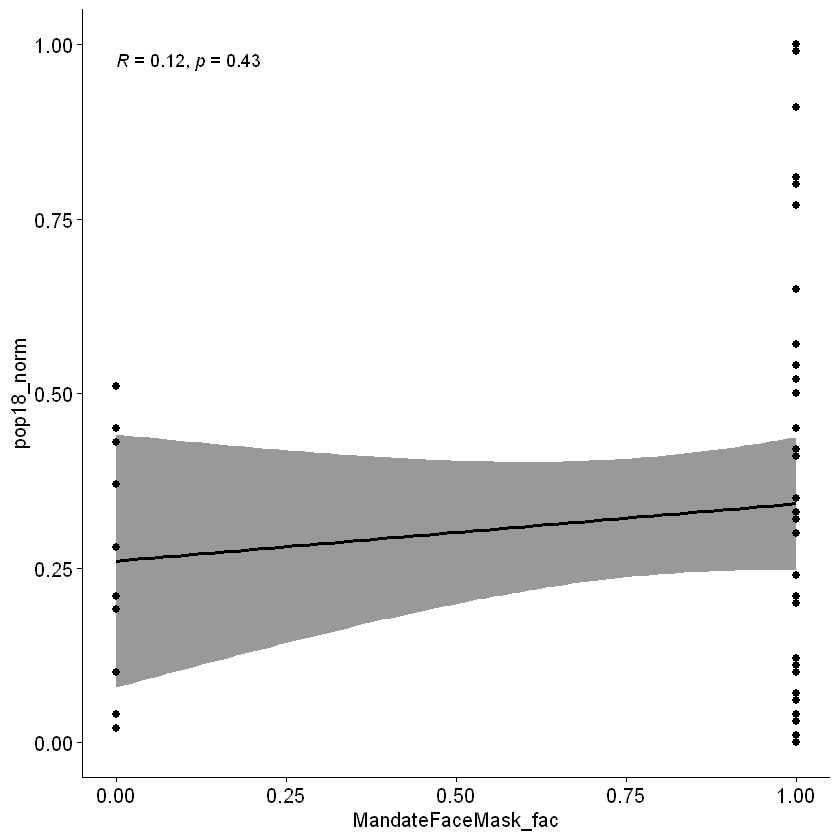

In [22]:
# correlation between the key variables

correl_df3 <- round(cor(x=df$pop18_norm,y= df$`MandateFaceMask_fac`), 2) 
correl_df3
ggscatter(df,x="MandateFaceMask_fac",y ="pop18_norm",, add = "reg.line", conf.int = TRUE, cor.coef = TRUE, cor.method =  "pearson")

The key variable population 2018 normalized and mandate face mask factor have very low correlation, hence we can use them for our base model.

###### Base Model

In [23]:
#Base Model: regression without 2 main covariates

linearmodel1 <- lm(case_norm ~ MandateFaceMask_fac + pop18_norm , data = df)
summary(linearmodel1)


Call:
lm(formula = case_norm ~ MandateFaceMask_fac + pop18_norm, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26586 -0.05692 -0.01208  0.04509  0.36001 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.02524    0.03975  -0.635    0.529    
MandateFaceMask_fac  0.05075    0.04150   1.223    0.228    
pop18_norm           0.68170    0.06100  11.175 2.66e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1153 on 43 degrees of freedom
Multiple R-squared:  0.7537,	Adjusted R-squared:  0.7422 
F-statistic: 65.79 on 2 and 43 DF,  p-value: 8.252e-14


In [24]:
# Multicollinearity check
vif(linearmodel1)

MandateFaceMask_fac          pop18_norm 
            1.01472             1.01472

As we have seen before, VIF of 1.01 for each regressor suggests that the factors are not co-related.
Also we can see from coefficient values, population strongly explains the total number of cases, but face mask mandate does not. If face mask mandatae factor is fixed,for every unit change in population will increase the total case number by .68. hence Higher the population, higher the number of cases. 
Also p value for population factor is highly significant, suggesting it to be s strong predictor.
From the adjusted R value, we see that Population and face mask mandate explain about 74% of the variation in total cases.

###### Improvement 1 on base model 

Now lets see if the error term can be explained by other covariates such as:
1. Number of days face mask mandate was delayed
2. Number of days business were closed
3. Number of days stay at home policy was in place


In [25]:
# correlation between the key variables
(correl_df4 <-round(cor(x=as.numeric(df$delay_facemask_mandate),y= df$case_norm), 2))
(correl_df5<-round(cor(x=as.numeric(df$BusinessClosed_duration),y= df$case_norm), 2))
(correl_df6<-round(cor(x=as.numeric(df$Stay_at_Home_duration),y= df$case_norm), 2))



[1] 0.2

[1] 0.43

[1] 0.14

R value for correlation between the Business close duration and total cases is 0.43, suggesting it to be a good predictor. However stay at home duration is not showing it to be great predictor.

In [26]:
linearmodel2 <- lm(case_norm ~  MandateFaceMask_fac + pop18_norm +delay_facemask_mandate+ BusinessClosed_duration + Stay_at_Home_duration  , data = df)
summary(linearmodel2 )



Call:
lm(formula = case_norm ~ MandateFaceMask_fac + pop18_norm + delay_facemask_mandate + 
    BusinessClosed_duration + Stay_at_Home_duration, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23128 -0.05683 -0.00556  0.03650  0.34131 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.0242743  0.1137440  -0.213    0.832    
MandateFaceMask_fac      0.0517850  0.0443902   1.167    0.250    
pop18_norm               0.6630841  0.0722609   9.176 2.17e-11 ***
delay_facemask_mandate  -0.0005367  0.0015507  -0.346    0.731    
BusinessClosed_duration  0.0032068  0.0020373   1.574    0.123    
Stay_at_Home_duration   -0.0021710  0.0014771  -1.470    0.149    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1131 on 40 degrees of freedom
Multiple R-squared:  0.7794,	Adjusted R-squared:  0.7519 
F-statistic: 28.27 on 5 and 40 DF,  p-value: 3.844e-12


In [27]:
#multicollienarity check
vif(linearmodel2)

MandateFaceMask_fac              pop18_norm  delay_facemask_mandate 
               1.205757                1.479048                1.438455 
BusinessClosed_duration   Stay_at_Home_duration 
               1.987641                1.624202

Since VIF of for each regressor is low (between 1 and 2), we can say that the factors are not co-related.

In this improvement, we still find mandate of face mask as not a good regressor, as its p values is not significant. Population is still a good predictor with significant p value. 
business closed duration is showing better p value than other predictors, but still not significant enough.
There is slight improvement in adjusted R value, but still the predictors can explain 75% of the variation in total cases.


###### Improvement 2 on base model 

Now lets include all other covariates that were discussed:
1. Number of days since face mask mandate has been applied in each state.
2. Poverty under risk serious illenss due to COVID

In [28]:
linearmodel3 <- lm(case_norm ~ MandateFaceMask_fac + pop18_norm +  delay_facemask_mandate + BusinessClosed_duration + Stay_at_Home_duration+ DaysSince_Facemask_mandate + at_risk_pop_norm, data =df)
summary(linearmodel3 )


Call:
lm(formula = case_norm ~ MandateFaceMask_fac + pop18_norm + delay_facemask_mandate + 
    BusinessClosed_duration + Stay_at_Home_duration + DaysSince_Facemask_mandate + 
    at_risk_pop_norm, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20109 -0.05187 -0.01409  0.04732  0.28964 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                 0.457381   0.317280   1.442  0.15761   
MandateFaceMask_fac         0.655116   0.383264   1.709  0.09555 . 
pop18_norm                  1.575173   0.493393   3.193  0.00283 **
delay_facemask_mandate     -0.010074   0.006233  -1.616  0.11431   
BusinessClosed_duration     0.003406   0.001967   1.731  0.09151 . 
Stay_at_Home_duration      -0.001767   0.001444  -1.224  0.22867   
DaysSince_Facemask_mandate -0.009512   0.005957  -1.597  0.11860   
at_risk_pop_norm           -0.926582   0.509339  -1.819  0.07677 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.

In [29]:
vif(linearmodel3)

MandateFaceMask_fac                 pop18_norm 
                 97.281372                  74.629188 
    delay_facemask_mandate    BusinessClosed_duration 
                 25.150341                   2.005844 
     Stay_at_Home_duration DaysSince_Facemask_mandate 
                  1.679751                 123.638918 
          at_risk_pop_norm 
                 73.472469

We see issue of multicollinearity with high VIF value for delay in facemask mandate with mandate face mask fac and days since face mask implementaed. This makes sense as they are correlated conceptually.
We can see the same for at risk population and population 2018 which are also conceptually correlated.
However we see that business closed duration and mandate in face mask factor have statistical significance with almost close to significant p value, however it is postively correlated with total cases.

## 3.  Assessment of CLM assumptions:
#### Assumption MLR.1 (linear in parameters): 
1. Our model is represented as 𝑦=𝛽0+𝛽1*MandateFaceMask_fac+𝛽2*pop18_norm+𝑢. So by definition we have met this assumption






#### Assumption MLR.2 (random sampling): 
1. The sampling method ensured all samples are randomly drawn from the population, and data points are iid—independently and identically distributed.
2. No clustering happened in the sampling method, because we get total number of cases/death in each providence, instead of only examining a limited number of people
3. No autocorrelation happened. We have cross-sectional data points, represented in each province, instead of time series data. So there is no significant correlation among samples in each province

#### Assumption MLR.3 (no perfect collinearity): 
1. We choose MandateFaceMask_fac, and pop18_norm as our independent variables, and there is no exact relationships nor perfect collinearity among the independent variables


#### Assumption MLR.4 (zero-conditional mean): 
1. we examine this assumption by looking at Residual vs Fitted value plot.
2. Ideally we could get a flat red line representing zero conditional mean. 
3. Here we got some curvature on the far right in the red curve, but the magnitude of curvature is very small (<-0.2). This could be caused by the so few data points on the right side of the plot
4. This non-normality is also reflected in the significance on the Shapiro test 
5. We don't have zero conditional mean. But because we have a large sample size of 46 (>30), we can rely on asymptotics and assess exogeneity. If we set aside causality and just look for the best fit line, exogeneity tells us that our estimates are consistent.

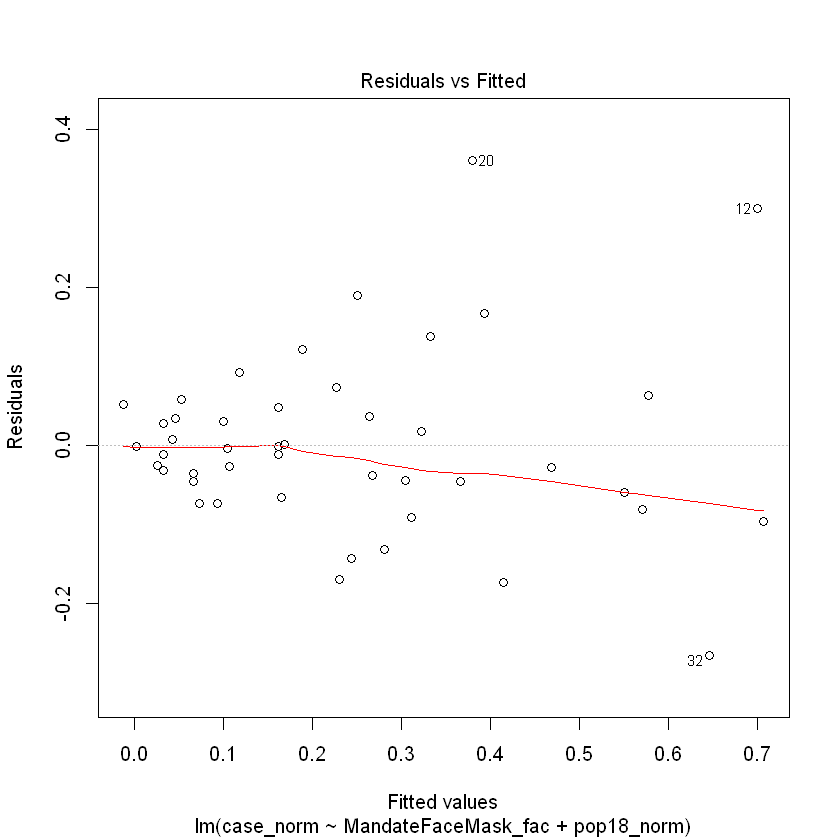

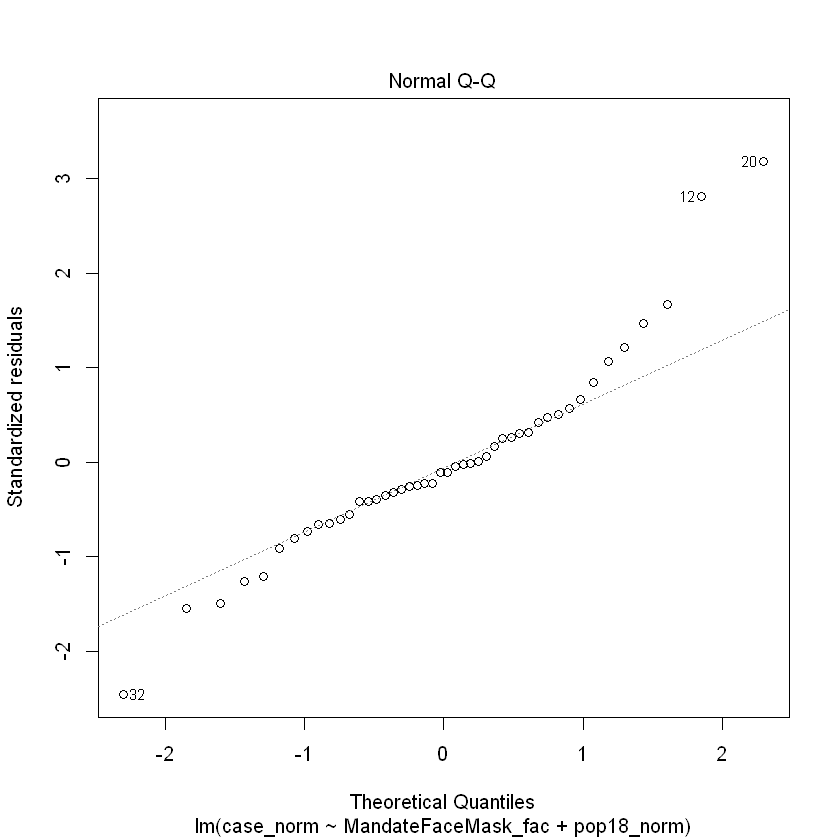

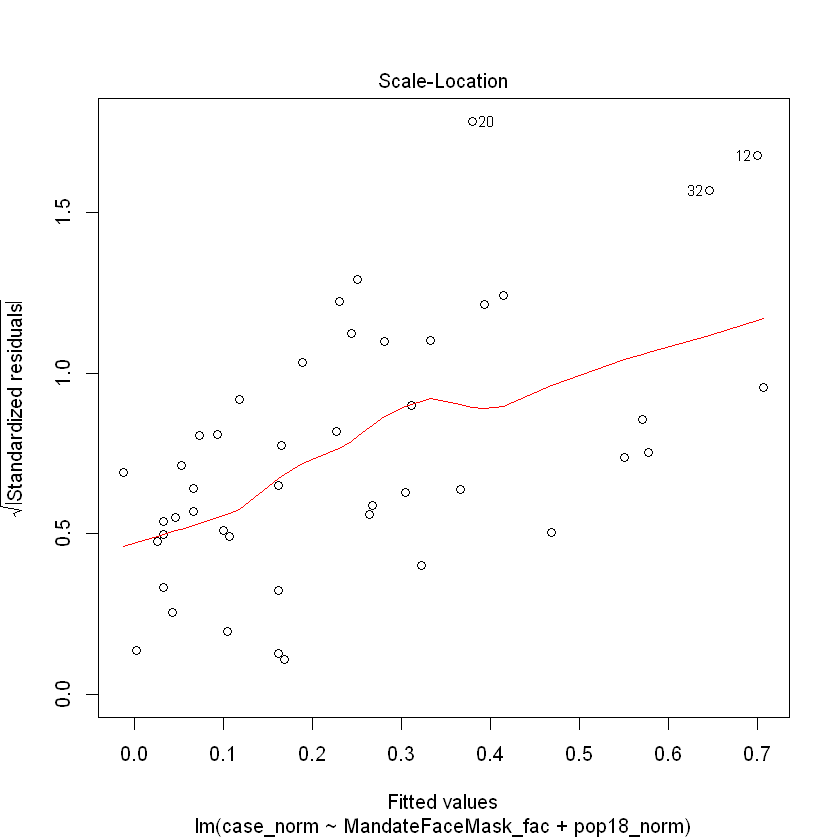

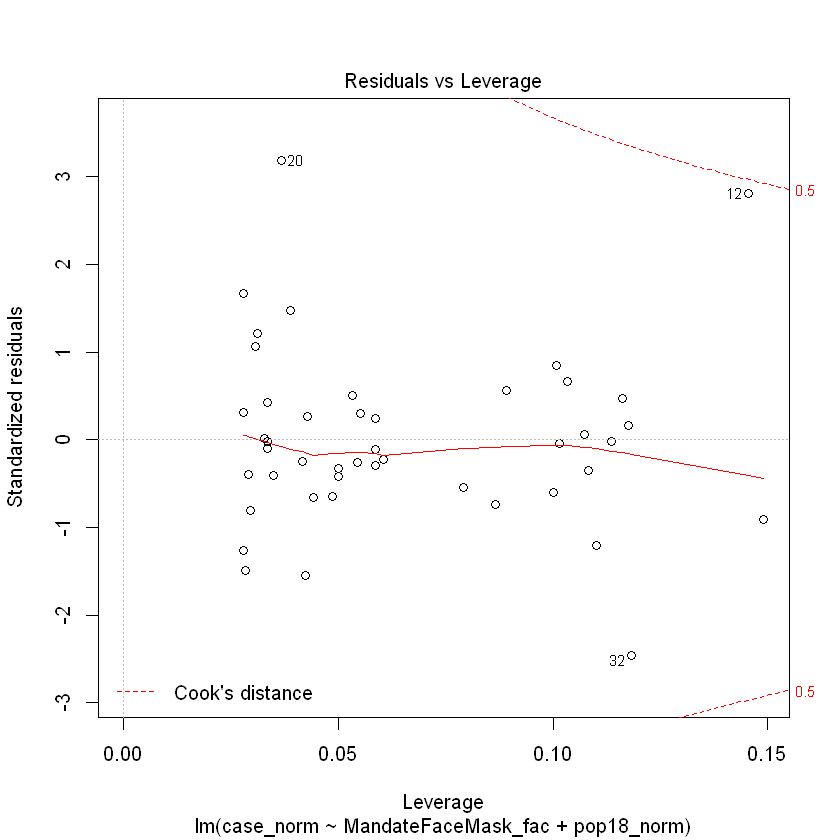

In [30]:
plot(linearmodel1)

In [31]:
shapiro.test(linearmodel1$residual)


	Shapiro-Wilk normality test

data:  linearmodel1$residual
W = 0.9381, p-value = 0.01664


#### Assumption MLR.5 (Homoskedasticity): 
1. We see from the scale-location plot, the red line is trending upwards, implying heteroskedasticity in our sample
2. We will proceed with heteroskedastic robust errors

In [32]:
#bptest(linearmodel1)

In [33]:
coeftest(linearmodel1, vcov = vcovHC)


t test of coefficients:

                     Estimate Std. Error t value  Pr(>|t|)    
(Intercept)         -0.025243   0.031281 -0.8070   0.42412    
MandateFaceMask_fac  0.050749   0.028649  1.7714   0.08358 .  
pop18_norm           0.681705   0.089167  7.6452 1.516e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#### Assumption MLR.6 (Normality of error terms):
1. From Q-Q plot, we could see standardized residual fits in a linear line in the middle of the plot, but there are some deviation on left and right side of the plot
2. Because we have a large sample size of 46 (>30), we could invoke Central Limit Theorem here which states OLS estimators are normally distributed for large sample sizes.


#### Influential Data Point:
1. From Residuals vs Leverage plot, we could see there are no data points with greater than 0.5 Cook's distance. So there is no data point with large influence to the model

## 4. Regression Table

In [34]:
(se.model1 = coeftest(linearmodel1, vcov = vcovHC)[ , "Std. Error"])
(se.model2 = coeftest(linearmodel2, vcov = vcovHC)[ , "Std. Error"])
(se.model3 = coeftest(linearmodel3, vcov = vcovHC)[ , "Std. Error"])

(Intercept) MandateFaceMask_fac          pop18_norm 
         0.03128083          0.02864893          0.08916721

(Intercept)     MandateFaceMask_fac              pop18_norm 
            0.113380078             0.032858395             0.108273145 
 delay_facemask_mandate BusinessClosed_duration   Stay_at_Home_duration 
            0.001393393             0.002608671             0.001307683

(Intercept)        MandateFaceMask_fac 
               0.276005213                0.333124528 
                pop18_norm     delay_facemask_mandate 
               0.788672477                0.005421436 
   BusinessClosed_duration      Stay_at_Home_duration 
               0.002469496                0.001263508 
DaysSince_Facemask_mandate           at_risk_pop_norm 
               0.005178028                0.810304628

In [35]:
stargazer(linearmodel1, linearmodel2, linearmodel3, type = "text", omit.stat = "f",
          se = list(se.model1, se.model2, se.model3),
          star.cutoffs = c(0.05, 0.01, 0.001))



                                         Dependent variable:              
                           -----------------------------------------------
                                              case_norm                   
                                 (1)             (2)             (3)      
--------------------------------------------------------------------------
MandateFaceMask_fac             0.051           0.052          0.655*     
                               (0.029)         (0.033)         (0.333)    
                                                                          
pop18_norm                    0.682***        0.663***         1.575*     
                               (0.089)         (0.108)         (0.789)    
                                                                          
delay_facemask_mandate                         -0.001          -0.010     
                                               (0.001)         (0.005)    
                        

#### Statistical significance:
1. In our model (1) and (2), Only one of the variable - pop18_norm is highly statistical significant after using heteroskedastic robust errors. 
2.  In model (3), after adding more independent variables, there are statistical significance for business closed duration and mandate_facemask_fac along with population variable. 

#### Practical significance:
We assess practical signifiance based on the magnitude of estimated beta. 
1. pop18_norm has the most practical significance. In model (1) and (2), pop18_norm increase by 1 unit of standard deviation, number of cases will increase by 0.68 and 0.636 unit of standard deviation, respectively. In model (3), pop18_norm increase by 1 unit of standard deviation, number of cases will increase by 1.57 unit of standard deviation. 
2. Business closed duration show significance in model 3 with significant p value, where number of cases increase by 0.03 unit of standard deviation.
3. From model (2) and (3), we see that delay_facemask_mandate is negatively correlated to number of cases, indicated that total cases increase with decrease in the delay. This is also contradicting our assumption.
4. Stay at home duration is negatively correlated, which mean longer the stay at home , lesser number of cases are observed. this makes practical sense with our assumption.
5. MandateFaceMask_fac dont show significant correlation with total number of cases in model (1) and (2), but show significance in model (3). However it is positively correlated with total cases which again does not go with our assumption.
6. DaysSince_Facemask_mandate is negatively correlated with cases in model 3, showing that later the face mask mandate applied, higher are the number of cases. However, this variable does not have significant p value.


## 5. A Discussion of Omitted Variables


In this section we will identify the following variables as omitted variables and analysis their effect on the regression model:

1. Medical capability
2. Percentage transportation in public vehicle
3. State population flow rate
4. Time since first 50 covid case
5. State GDP per capita in 2019

Note our regression model can be represented as the following: 

>$y = \beta_0 + \beta_1\text{MandateFaceMask_fac} + \beta_2\text{pop18_norm} + \beta_3\text{delay_facemask_mandate} + \beta_4\text{BusinessClosed_duration} + \beta_5\text{Stay_at_Home_duration} + \mu$

where y is the number of cases normalized.
   
Coefficients:
                                   Estimate     
(Intercept)                      -0.0242743     
MandateFaceMask_fac               0.0517850      
pop18_norm                        0.6630841      
delay_facemask_mandate           -0.0005367      
BusinessClosed_duration           0.0032068      
Stay_at_Home_duration            -0.0021710      

We assume the omitted bias is introduced with the omitted variable included in $\mu$ such that:
>$y = (\beta_0+\beta_6\delta_0) + (\beta_1+\beta_6\delta_1)\text{MandateFaceMask_fac} + (\beta_2+\beta_6\delta_2)\text{pop18_norm} + (\beta_3+\beta_6\delta_3)\text{delay_facemask_mandate} + (\beta_4+\beta_6\delta_4)\text{BusinessClosed_duration} + (\beta_5+\beta_6\delta_5)\text{Stay_at_Home_duration} + \mu$

where $\beta_6$ is the coefficient of the omitted variable and $\delta_x$ is its relationship with other variables respectively.

The following discussion around individual omitted variables will be referring to the equation mentioned above.


#### Medical Capability

##### Summary
> If $\beta_6 < 0$ and $\delta_1 < 0$ then $OMVB = \beta_6\delta_1>0$ and if $\beta_1 < 0$ then the OLS coefficient on $\text{delay_facemask_mandate}$ will be scaled towards zero (less negative) losing statistical significance.


##### Reasoning
The medical capability (MC) should be negatively correlated with the number of covid cases. As the medical capabilities goes up, people are treated more quickly thus reducing the possible spread of the virus.

The medical capability would be negatively correalted with the delay_facemask_mandate. This is because if the medical supply is abundant, it would be quicker to provide citizens with face mask resources.

The medical capability is assumed to be independent with all other variables.

In this case, since MC is negatively correlated with y and negatively correlated with delay_facemask_mandate, 
$\beta_1+\beta_6\delta_1$ has the latter part as a positive number. This biases the overall result towards 0 as $\beta_1$ is found to be a negative number. Thus, omitting this variable reduces the effect of delay_facemask_mandate.


#### Percentage Transportation In Public Vehicle

##### Summary
> If $\beta_6 > 0$ and $\delta_4 < 0$ then $OMVB = \beta_6\delta_4<0$ and if $\beta_4 > 0$ then the OLS coefficient on $\text{BusinessClosed_duration}$ will be scaled towards zero (less positive) losing statistical significance.


##### Reasoning

The percentage transporation in public vehicle (PTPV) should be positively correlated with the number of covid cases. As the percentage of transportation done in the public vehicles increases, it is reasonable to assume that people will spread the virus quicker, thus increasing the number of cases.

The PTPV should be negatively correlated BusinessClosed_duration. The assumption is the greater the PIPV, the lower the average income of the state; the lower the average income, the quicker the businesses has to be reopen to boost the economy so people don't go bankrupt. 

The PIPV is assumed to be independent of all other variables.

In this case, since PIPV is positively correlated with y and negatively correlated with BusinessClosed_duration, $\beta_4+\beta_6\delta_4$ has the latter part as a negative number. Since $\beta_4$ is a positive number, this omitted variable will bias the result towards 0. Thus, omitting this variable reduces the effect of BusinessClosed_duration.

It is possible to estimate this variable using Percent living under the federal poverty line (2018) because these two variables both estimate the underlying variable: the economic well-being of the residents in the state.



#### State Population Flow Rate

##### Summary
> If $\beta_6 > 0$ and $\delta_5 < 0$ then $OMVB = \beta_6\delta_5<0$ and if $\beta_5 < 0$ then the OLS coefficient on $\text{Stay_at_Home_duration}$ will be scaled away from zero (more negative) gaining statistical significance.


##### Reasoning

The state population flow rate (SPFR) should be positively correlated with the number of covid cases. The greater the flow rate in and out the state, the higher the chances for covid to transmit, thus higher the number of cases.

The SPFR should be negative correlated with Stay_at_Home_duration. This is because the longer the stay at home duration, the less travel is going to be done in and out the state.

The SPFR is assumed to be independent of all other variables.

In this case, since SPFR is positively correlated with the # of covid cases and negatively correlated with the Stay_at_Home_duration, $\beta_5+\beta_6\delta_5$ has the latter part as a negative number. Since $\beta_5$ is estimated to be negative, this bias actually pushed the result away from 0. This could imply that Stay_at_Home_duration doesn't actually have an impact on the # of covid cases.


#### Time Since First 50 Covid Cases

##### Summary
> If $\beta_6 > 0$ and $\delta_3 < 0$ then $OMVB = \beta_6\delta_3<0$ and if $\beta_3 < 0$ then the OLS coefficient on $\text{delay_facemask_mandate}$ will be scaled away from zero (more negative) gaining statistical significance.


##### Reasoning

It is important to look at the time since the first 50 covid cases (TSF50Covid) because the greater the time, the more cases are accumulated. It is positively correlated with y.

The TSF50Covid would be negatively correlated with the delay_facemask_mandate. This is because the longer the time since the first 50 cases, the more likely the state is going to implement the mandate face mask policy earlier. 

The TSF50Covid is assumed to be independent of all other variables.

In this case, TSF50Covid is positively correlated with # of covid cases and negatively correlated with delay_facemask_mandate, $\beta_3+\beta_6\delta_3$ is going to have the latter as a negative number. Since $\beta_3$ is a negative number, this omitted variable is pushing the result away from 0.

It is possible to estimate this variable using the date of state emergency as it is reasonable to assume the state emergency is only issued when the covid situation is severe enough.


#### State GDP Per Capita In 2019

##### Summary
> If $\beta_6 < 0$ and $\delta_4 > 0$ then $OMVB = \beta_6\delta_4<0$ and if $\beta_4 > 0$ then the OLS coefficient on $\text{BusinessClosed_duration}$ will be scaled towards zero (less positive) losing statistical significance.


##### Reasoning

The state GDP per capita in 2019 (SGDP) should be negatively correlated with the number of covid cases. As the state GDP increases, it would be easier for people to stay at home for longer period of time without working, it is reasonable to assume that people will thus spread the virus slower, lowering the total number of cases.

The SGDP should be positively correlated BusinessClosed_duration. The assumption is the greater the SGDP, the more savings people have and thus the longer the businesses can remained closed without appling pressure to be reopened.

The SGDP is assumed to be independent of all other variables.

In this case, since SGDP is negatively correlated with y and positively correlated with BusinessClosed_duration, $\beta_4+\beta_6\delta_4$ has the latter part as a negative number. Since $\beta_4$ is a positive number, this omitted variable will bias the result towards 0. Thus, omitting this variable decreases the appeared effect of BusinessClosed_duration. In this sense, the business closed duration may actually have more of an impact than what we have measured it to be.

It is possible to estimate this variable using Percent living under the federal poverty line (2018) because these two variables both estimate the underlying variable: the economic well-being of the residents in the state.

## 6. A Conclusion






In the models that was built, we expected to find correlation between the policy of mandate face mask in public facing businesses and the total number of covid-19 cases. To our surprise, these two variables are slightly positively correlated with a weight of .2 with almost no stastical significance (p < 0.05). It contradicts our hypothesis that the mandated face mask policy will result in lesser number of covid cases. Furthermore, we find that the delay in application of  face mask policy is negatively correlated with the over all covid caess, which demonstrates a counter intuitive implication that earlier adoption of mandating face mask is correlated with a greater number of covid cases. Therefore, relating back to the research question of whether mandating face masks in public facing business reduces the spread of covid-19, we found that to be not the case.

Though the data does not support our hypothesis, we still encourage other studies to be done on related topics. In hindsight, the dataset that was available was not adequately appropriate for the effect that we are trying to measure. The presence of omitted variable such as the timeline of the spread of the virus and peak point for each state inhibits the ability to accurately assess the realistic time indepdent impact of the virus.

However, the result shed light on how the mandate face mask policy was implemented. Given the correlation that was found in the model, it can be explained by how policies are created. The policy of mandating face mask usage is going to be implemented, and, earlier in time, if there is an imminent threat of the virus. The correlation that we found was an indication that the policy makers are unwilling to take certain measure for prevention until it is too late. This would be a great hypothesis for another study.